# Lecture 17 - Search Algorithms (https://bit.ly/intro_python_17)

Today: 
* A couple of simple list algorithms:
  * Linear search
  * Binary search 
* A very brief introduction to runtime analysis and Big O Notation
* Word counting with dictionaries


# Algorithms

* Algorithm: a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation.
  * They can be defined abstractly as high level computer instructions, and implemented in any (Turing complete) programming language

* Algorithms are frequently coupled with data structures: a data structure is a data organization, management, and storage format that enables efficient access and modification.

* We develop algorithms and associated data structures to solve problems, like search, or pattern recognition, etc.

* We compare algorithms according to their performance characteristics, typically:
  * Speed
  * Memory and computational requirments
  * Performance at the task - do they solve the problem? If partially, how well?


To give you a flavor of how think about and develop algorithms and data structures today we'll look at problems of searching text and develop a couple of simple algorithms and compare them. 

# Loading Some Test Data

We're going to implement some methods to search a corpus (collection) of words.

Let's start by grabbing some text. Here, we'll load Alice in Wonderland (the example used in the open text book):

In [3]:
import urllib.request

# Location of book
url = "http://openbookproject.net/thinkcs/python/english3e/_downloads/alice_in_wonderland.txt"
local_copy = "alice_in_wonderland.txt" # Local file to store book in

urllib.request.urlretrieve(url, local_copy) # This function copies the 
# thing the url points at into the local file copy

with open(local_copy) as fh: # Read from the local file into a string
  alice_text = fh.read()

We've loaded the data, let's check it looks okay:

In [4]:
print(alice_text[:85]) # Check we've got the words


ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll



CHAPTER I. Down the Rabbit-Hole




Let's preprocess the data into lowercase words:

In [5]:
# Make all the alphabet characters lower case (so that we ignore capitalization)
alice_text = alice_text.lower()

alice_words = alice_text.split() # Chop the text up into individual words
# using the split() method, which breaks the string up at whitespace

Finally, let's check it:

In [6]:
## Checking again:
print("There are: " + str(len(alice_words)) + " words")

print(alice_words[:85])

There are: 26443 words
["alice's", 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'chapter', 'i.', 'down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank,', 'and', 'of', 'having', 'nothing', 'to', 'do:', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading,', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it,', "'and", 'what', 'is', 'the', 'use', 'of', 'a', "book,'", 'thought', 'alice', "'without", 'pictures', 'or', "conversation?'", 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(as', 'well', 'as', 'she', 'could,', 'for', 'the', 'hot', 'day']


# Linear Search

Let's implement a simplest possible method to check if a search word is in Alice in Wonderland:

In [7]:
# First, a quick aside on "enumerate()"

# enumerate is a cool function which returns for each
# element v in a list a pair (i, v), where i is the index of v in the list
for (i, word) in enumerate("some words in a string".split()):
  print("index:", i, "word:", word)

index: 0 word: some
index: 1 word: words
index: 2 word: in
index: 3 word: a
index: 4 word: string


In [8]:
def search_linear(text, target):
    """ Find and return the index of the first instance of target in text.
    """
    for (i, word) in enumerate(text): 
       if word == target:
           return i # We return the first index
    return -1 # We did not find the string

The **algorithm** here is the simplest you  think of - informally: to check if the word is in the text start reading the text from the beginning, and then, if you find it, return, otherwise keep going until you reach the end. Let's check it works:

In [9]:
x = search_linear(alice_words, target="hatter") # Search for the word "hatter" in the text" - this should
# be here, cos of the "Mad Hatter"

if x != -1:
  print("Found hatter at: ", x, " context: ", alice_words[x:x+100]) # Check the match

Found hatter at:  13384  context:  ['hatter', "instead!'", 'chapter', 'vii.', 'a', 'mad', 'tea-party', 'there', 'was', 'a', 'table', 'set', 'out', 'under', 'a', 'tree', 'in', 'front', 'of', 'the', 'house,', 'and', 'the', 'march', 'hare', 'and', 'the', 'hatter', 'were', 'having', 'tea', 'at', 'it:', 'a', 'dormouse', 'was', 'sitting', 'between', 'them,', 'fast', 'asleep,', 'and', 'the', 'other', 'two', 'were', 'using', 'it', 'as', 'a', 'cushion,', 'resting', 'their', 'elbows', 'on', 'it,', 'and', 'talking', 'over', 'its', 'head.', "'very", 'uncomfortable', 'for', 'the', "dormouse,'", 'thought', 'alice;', "'only,", 'as', "it's", 'asleep,', 'i', 'suppose', 'it', "doesn't", "mind.'", 'the', 'table', 'was', 'a', 'large', 'one,', 'but', 'the', 'three', 'were', 'all', 'crowded', 'together', 'at', 'one', 'corner', 'of', 'it:', "'no", 'room!', 'no', "room!'", 'they']


In [10]:
# Let's check a negative case:
x = search_linear(alice_words, target="donald") # Search for the word "donald" in the text"
# I don't remember a Donald in the book

print(x) # Donald is not in the text

-1


# Challenge 1

In [11]:
# Adapt search_linear to find and return the last instance of the target in the text. 
# Call the adapted function search_linear_reversed

# Pseudocode

Often times when we write algorithms in **pseudocode**, a programming language like description of the procedure that is sufficintly formal to allow implementation. For example, we can write down the linear 
search algorithm in pseudocode:

* let s be the search word
* let t be the text we are searching as a list of words
* let j equal -1

* for each word w and its index i in t, from beginning to end:
    * if s equals w:
        * j = i, setting the index of w in t
        * break out of the loop

* at termination at j equals the first index of s in t or -1 if s is not contained in t

Pseudocode should be sufficiently detailed to make it clear how to implement it, but it need not be an actual implementation in a language like Python.

# Big O Notation - Analysing Computational Complexity

* Say that *N* is the number of words in the text you're searching.  It takes in the worst case (if the word you search for is not in the text) *N* string comparisons for search_linear() to run. 

* We denote this O(N) time, which is just a shorthand called "Big O notation" for saying that the **worst-case running time** of search_linear is linear in the length of the text. 

*  For many applications, O(N) may be just fine, but often, if you want to analyse a lot of data, or if you want to run the algorithm a lot of times, you find you need faster methods. Even if you're not a hard-core developer, it's worth bearing this in mind when you develop code, because a frequent error state is simply that your code is too slow to run (and therefore appears to be hanging forever).

# Binary Search

Let's say we can first sort the words in the text. Given a sorted list of the words in the book "binary search" is a much faster method.

Here's an illustration - we are searchng for 7 in the sorted list of integers (example from Wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Binary_Search_Depiction.svg/2880px-Binary_Search_Depiction.svg.png" width=800 height=400 />


We start from the middle of the list, and then check if the middle element is less than, equal or greater than the search query. Based on the result we either find the query or can halve the size of the search, and so recursively solve the problem.

# Binary Search Pseudocode

* let s be the search word
* let t be the text we are searching as a list of N words sorted
in ascending order

* let l = 0, the leftmost index of our search interval (inclusive)
* let r = N, rightmost index of search interval (exclusive)
* let i = -1 

* while l < r, the interval that we are searching is non-zero length
  * m = (l + r) // 2, the mid point of the interval

  * if s < t[m]: (If the word is in t it must be in the interval l, m)
    * r = m # Shrink the interval from the right

  * else if s > t[m]: (If the word is in t it must be in the interval m+1, r)
    * l = m+1 # Shrink the interval from the left

  * else: s must equal t[m]
    * i = m
    * break out of the loop

* at termination i equals an index of s in t or -1 if s is not contained in t
  

Let's translate this into a Python function:

In [12]:
def search_binary(sorted_text, target, debug_print=False):
    """ Find and return an index of target in sorted_text
    """
    # l and r represent the region of interest (ROI) that we search over
    # initially the ROI is the whole of xs
    l = 0 
    r = len(sorted_text)
    
    while l < r:
        m = (l + r) // 2 # The mid point of the interval

        if debug_print:
          print("Interval[{0}:{1}](size={2}), probed='{3}', target='{4}'"
                 .format(l, r, r-l, sorted_text[m], target))

        if target < sorted_text[m]:
          r = m

        elif target > sorted_text[m]:
          l = m+1

        else:
          assert target == sorted_text[m] # Sanity check
          return m
    
    return -1 # If we've gotten here the word isn't in the text

So, let's test it:

In [16]:
# Let's demo search binary

sorted_alice_words = sorted(alice_words) # Sort the words in alice in wonder land into
# dictionary order

#print(sorted_alice_words[:100])

x = search_binary(sorted_alice_words, target="hatter", debug_print=True) # Search for the word "hatter" in the text" 

if x != -1:
  print("Found hatter at: ", x) # Check the match

Interval[0:26443](size=26443), probed='many', target='hatter'
Interval[0:13221](size=13221), probed='distraction,', target='hatter'
Interval[6611:13221](size=6610), probed='herself.', target='hatter'
Interval[6611:9916](size=3305), probed='get', target='hatter'
Interval[8264:9916](size=1652), probed='hare:', target='hatter'
Interval[9091:9916](size=825), probed='hearts', target='hatter'
Interval[9091:9503](size=412), probed='he', target='hatter'
Interval[9091:9297](size=206), probed='have', target='hatter'
Interval[9091:9194](size=103), probed='hatter', target='hatter'
Found hatter at:  9142


In [17]:
# Let's check a negative case:
x = search_binary(sorted_alice_words, target="donald", debug_print=True) # Search for the word "donald" in the text"
# I don't remember a Donald in the book

print(x) # Donald is not in the text

Interval[0:26443](size=26443), probed='many', target='donald'
Interval[0:13221](size=13221), probed='distraction,', target='donald'
Interval[6611:13221](size=6610), probed='herself.', target='donald'
Interval[6611:9916](size=3305), probed='get', target='donald'
Interval[6611:8263](size=1652), probed='eye,', target='donald'
Interval[6611:7437](size=826), probed='dreamy', target='donald'
Interval[6611:7024](size=413), probed='door,', target='donald'
Interval[6611:6817](size=206), probed='doesn't', target='donald'
Interval[6715:6817](size=102), probed='don't', target='donald'
Interval[6767:6817](size=50), probed='done', target='donald'
Interval[6767:6792](size=25), probed='don't', target='donald'
Interval[6780:6792](size=12), probed='don't!'', target='donald'
Interval[6787:6792](size=5), probed='done', target='donald'
Interval[6787:6789](size=2), probed='done', target='donald'
Interval[6787:6788](size=1), probed='done', target='donald'
-1


# Challenge 2

In [22]:
# Write an adapted version of search_binary that uses recursion

def search_binary_recursive(sorted_text, target):
    """ Find and return an index of target in sorted_text
    """
    # Code to write - hint, use slices to reduce the size of the list to search
    
x = search_binary_recursive(sorted_alice_words, "hatter") # Search for the word "hatter" in the text" 

if x != -1:
  print("Found hatter at: ", x, " context: ", sorted_alice_words[x-10:x+10]) # Check the match

Found hatter at:  9139  context:  ['hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', 'hatter', "hatter's", 'hatter,']


# Analysing Computational Complexity

* Intuitively binary_search seems a lot faster than the linear_search. But, can we figure out it's actual worst case running time?

* Knowing the worst-case is helpful, because it lets us design robust programs that will always run quickly, regardless of the input.

* Again, N is the number of words in the text. 

* At each loop of the code we halve the size of the list we're searching. It follows we can not perform more than log2(N) loops to find any word (or establish it is not there). (See the text book for a slightly more detailed explanation). 

* The worst case running time is therefore O(log(N)). 
  * Note, we drop the log2, because d * log2(N) = logX(N), and with this kind of analysis, we don't care about the coefficients, just the nature of the scaling curve.





# Comparing Linear vs. Binary Search Empirically

In [23]:
# So, what is the speed difference for queries to these methods on data?

import time
import random

# Sample with replacement 10,000 words from the book 
## Reminder: this is a list comprehension: super useful
test_words = [ random.choice(alice_words) for i in range(10000)] 

# Sum up the amount of time it takes to locate these words in the book
# using the linear search method
total_linear_time = 0
for test_word in test_words:
  start_time = time.time() # time.time() gives the time in seconds to high precision
  search_linear(alice_words, target=test_word)
  total_linear_time += time.time()-start_time

# Print the total linear search time
print("It took " + str(total_linear_time) + " seconds to search linear")


It took 0.9859857559204102 seconds to search linear


Okay, how about binary search?

In [24]:
# Sum up the amount of time it takes to locate these words in the book
# using the binary search method
total_binary_time = 0
for test_word in test_words:
  start_time = time.time()
  search_binary(sorted_alice_words, target=test_word)
  total_binary_time += time.time()-start_time

print("It took " + str(total_binary_time) + " seconds to search binary")

print("Speed up of binary vs. linear is: " + 
      str(total_linear_time/total_binary_time) + " times")

It took 0.012222051620483398 seconds to search binary
Speed up of binary vs. linear is: 80.67268790355617 times


# Word Counting with Dictionaries

Okay, we've seen how by sorting the text and formulating a better algorithm we can improve from O(N) to O(log(N)) time to search for a word in our text.

Can we do better?

Now we use a dictionary to produce a map from the words in the text to their locations:

In [ ]:
def index_words(words):
  """ Returns a dictionary of words. 
  
  words is a list of strings, each representing a word.
  
  The return value is a dictionary whose keys are the words in "words" and
  whose values are lists, each representing the unique occurrences of the given
  word.
  """
  d = {}
  for i, word in enumerate(words): # Using enumerate again
    if word in d: # Test is the word is already in the index, if it is
      # just add the occurrence to the index
      d[word].append(i)
    else: # Otherwise, create a new entry, storing the occurence in a list
      d[word] = [ i ]
      
  return d      

Let's test it:

In [ ]:
alice_dict = index_words(alice_words)

print("There are {} unique words in Alice.".format(len(alice_dict)))

print("Hatter occurs {} times in Alice".format(len(alice_dict["hatter"])))

print("These are the occurrences of hatter in Alice:", alice_dict["hatter"])

There are 4940 unique words in Alice.
Hatter occurs 24 times in Alice
These are the occurrences of hatter in Alice: [13384, 13411, 13640, 13865, 13964, 14179, 14267, 14427, 14500, 14585, 14629, 14969, 15041, 15174, 23193, 23300, 23580, 23614, 23657, 23684, 23737, 23800, 24021, 24051]


# The Computational Complexity of Dictionary Search

Recall that Python dictionaries are backed by hash tables, a data structure that produces a function from a set of keys to a set of values:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Hash_table_5_0_1_1_1_1_1_LL.svg/2560px-Hash_table_5_0_1_1_1_1_1_LL.svg.png" width=800 height=400 />


Making a few assumptions that the hash table is setup correctly the cost of looking up a key in a hashtable is O(1). 
  * Hash functions are typically O(1)
  * Looking up the index of the hash value is O(1)
  * Returning the address of the value in the bucket is O(1). If you are interested in more details see: https://en.wikipedia.org/wiki/Hash_table


Given the dictionary, the algorithm to determine the location of a word in the dictionary is trivial - you just look it up!

With the dictionary we have therefore reduced the search to an O(1) operation! This comes at the expense of building the hash table and keeping it in memory, but often this is a good trade!





# Comparing Dictionary vs. Linear vs. Binary Search Empirically

In [ ]:
# Sum up the amount of time it takes to locate these words in the book
# using the binary search method
total_dict_time = 0
for test_word in test_words:
  start_time = time.time()
  if test_word in alice_dict: # This checks if the word is in the dictionary
    pass
  total_dict_time += time.time()-start_time

print("It took " + str(total_dict_time) + " seconds to search the dictionary")

print("Speed up of dictionary vs. linear is: " + 
      str(total_linear_time/total_dict_time) + " times")

print("Speed up of dictionary vs. binary is: " + 
      str(total_binary_time/total_dict_time) + " times")

It took 0.0031709671020507812 seconds to search binary
Speed up of dictionary vs. linear is: 692.2086466165414 times
Speed up of dictionary vs. binary is: 7.750902255639097 times


# Summary

We've covered the concepts of data structures and algorithms today, but obviously we've barely scratched the surface. 

The takeaway concepts:

* Algorithm: a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation.

* Data structures: a data structure is a data organization, management, and storage format that enables efficient access and modification.

* Pseudocode: a formal, language independent description of an algorithm

* Computational complexity and Big O notation - an abstract way of reasoning about the cost of running an algorithm, invariant to the underlying computer




# Finally...

Just for fun, let's use a plotting library to plot the frequency distribution of words in the book (don't worry, you don't need to know how to use this library, it won't be on the test):

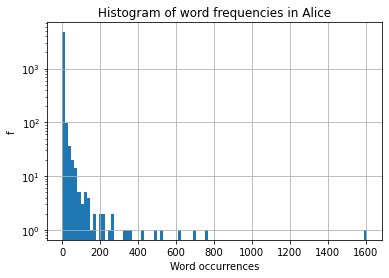

In [ ]:
import matplotlib.pyplot as plt

x = [ len(alice_dict[i]) for i in alice_dict ] # Counts of words in Alice

# the histogram of the data, using 100 bins
n, bins, patches = plt.hist(x, 100, log=1)

plt.xlabel('Word occurrences')
plt.ylabel('f')
plt.title('Histogram of word frequencies in Alice')
plt.grid(True)
plt.show()

# Challenge 3: Indexing with dictionaries

In [ ]:
# Write a function "index_capitalized_words" to build a dictionary of all words starting 
# with a capital letter and their occurrences in the text.

# E.g. if the text was [ "Alice!", "said", "the", "Queen", "of", "Hearts.", "Alice!"]
# the return value of the function would be { "Alice!":[0,6], "Queen":[3], "Hearts.":[5] }

# First let's reload Alice to not ignore capitalization:
with open(local_copy) as fh:
  alice_text = fh.read()
alice_words = alice_text.split()

# Code to complete here



# Test code
d = index_capitalized_words(alice_words)
print("There are {} capitalized words in Alice".format(len(d)))
  


# Homework

* Zybooks Reading 17
* Go to Canvas and complete the lecture quiz, which involves completing each challenge problem
* Please, please fill out the SETS evaluation for CSE20! We appreciate any kind comments and constructive criticism you have!!